In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


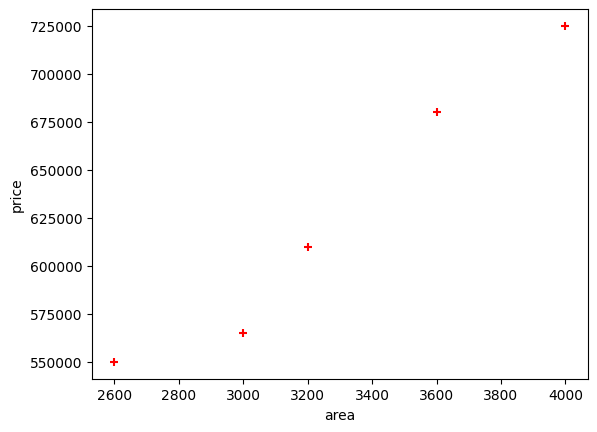

In [7]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [9]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [11]:
reg.predict([[3300]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [12]:
reg.coef_

array([135.78767123])

In [13]:
reg.intercept_

np.float64(180616.43835616432)

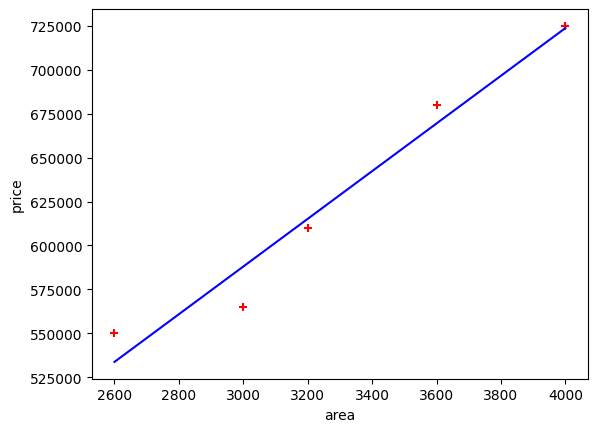

In [19]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [15]:
d=pd.read_csv("areas.csv")
d.head(3)

,area
0,1000
1,1500
2,2300


In [16]:
p=reg.predict(d)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [17]:
d['prices']=p

In [18]:
d.to_csv("prediction.csv",index=False)

In [22]:
c=pd.read_csv("canada_per_capita_income.csv")
c.head(50)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


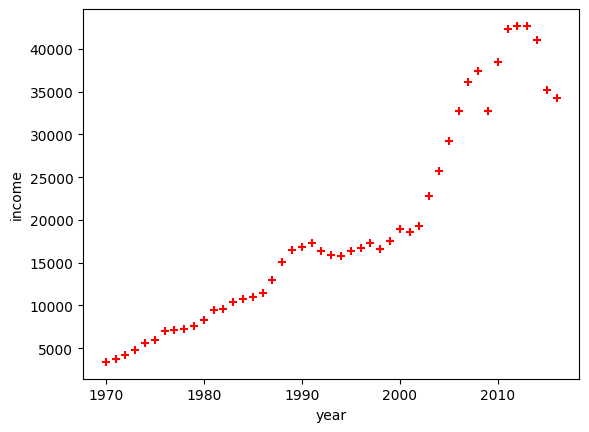

In [26]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(c['year'], c['per capita income (US$)'], color='red', marker='+')

In [27]:
reg2=linear_model.LinearRegression()
reg2.fit(c[['year']],c['per capita income (US$)'])

LinearRegression()

In [29]:
reg2.predict([[2024]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([43774.08932009])

In [35]:
new_years=pd.DataFrame({'year': np.arange(2017,2025)})
new_years

,year
0,2017
1,2018
2,2019
3,2020
4,2021
5,2022
6,2023
7,2024


In [36]:
new_years['per capita income (US$)']=reg2.predict(new_years[['year']])
new_years

,year,per capita income (US$)
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395


In [39]:
c_extend=pd.concat([c,new_years],ignore_index=True)


In [41]:
c_extend.to_csv("canada_per_capita_income.csv",index=False)

In [42]:
c_extend

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


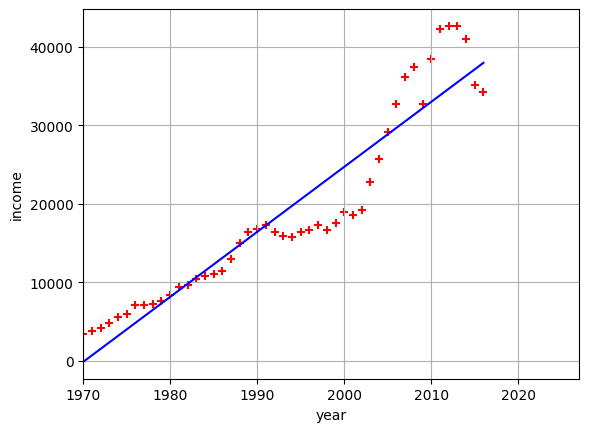

In [32]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(c['year'],c['per capita income (US$)'],color='red',marker='+')
plt.plot(c['year'],reg2.predict(c[['year']]),color='blue')
plt.xlim(c['year'].min(), 2027)
plt.grid(True)
plt.show()